# Time Series EDA

- Time Series Train-Test Split
    1. Human-based
    1. Percentage Based
    1. Cross Validate Splits
- 10 Awesome Time Series Visualizations to Impress Your Friends and Family
    1. Blow off the time series
    1. y over time
    1. y averaged over various periods over time
    1. y.diff() over time
    1. Seasonal Plot
    1. Seasonal Subseries Plot
    1. Lag Plot
    1. Autocorrelation Plot
    1. Seasonal Decomposition
    1. Area Plots
- Aside: working with dates in matplotlib
- Aside: `strftime`

## Setup

We'll be looking at temperature data for san antonio from late 2012 to late 2017.

We'll need to convert from Kelvin to Fahrenheit.

°F = (K - 273.15) x 1.8000 + 32.00

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [10]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')

In [11]:
df = pd.read_csv('sa_temps.csv', index_col='datetime', parse_dates=True).sort_index()
df.temp = (df.temp - 273.15) * 1.8 + 32

print('Date Range:', df.index.min(), 'to', df.index.max())
df.head()

Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00


,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747


In [12]:
df.shape[0]

45252

In [4]:
df.temp.describe()

count    45252.000000
mean        69.144163
std         14.946638
min         17.420000
25%         59.810000
50%         71.661650
75%         79.412000
max        104.918000
Name: temp, dtype: float64

- **seasoning**: stuff you put on your food

- **seasonality**: a repeated cycle in the data. Occurs at a fixed frequency. In our weather data there is yearly and daily seasonality
- **trend**: long term upwards or downwards movement
- **cycle**: Some arbitrary chunk of time, usually longer than a season, or consists of multiple seasons

## Train-Test Split

- Ideally all splits contain a season
- Human-based: use the last year as test
- Percentage based: use the last 20% as test
- Cross Validate: break data up into slices and use successive slices as train and test repeatedly (`sklearn.model_selection.TimeSeriesSplit`)
    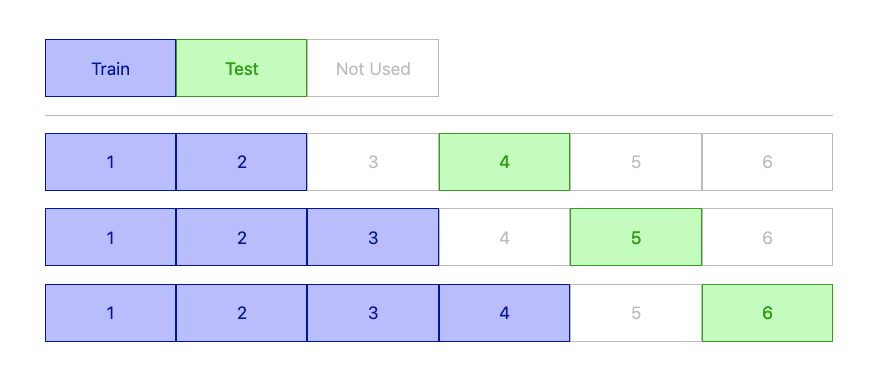

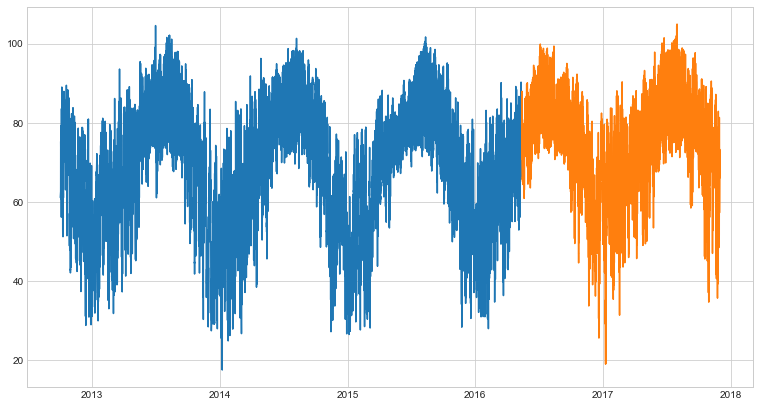

In [14]:
# Percentage-Based
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

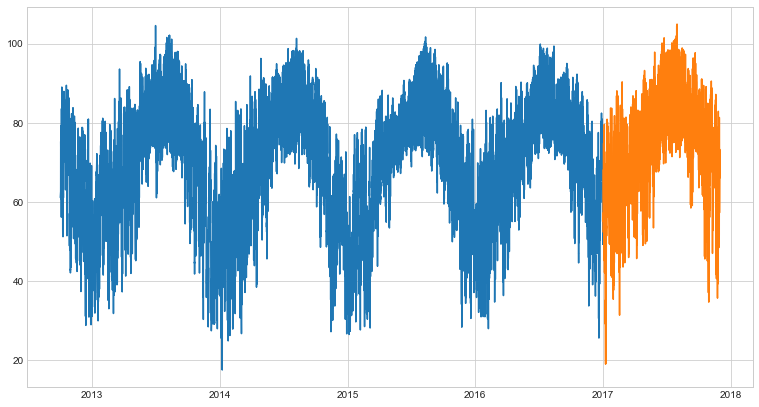

In [6]:
# Human-Based
train = df[:'2016'] # includes 2016
test = df['2017']

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

## Visualizations

In [18]:
y = train.temp
y.head()

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
Name: temp, dtype: float64

1 Blow off the time series

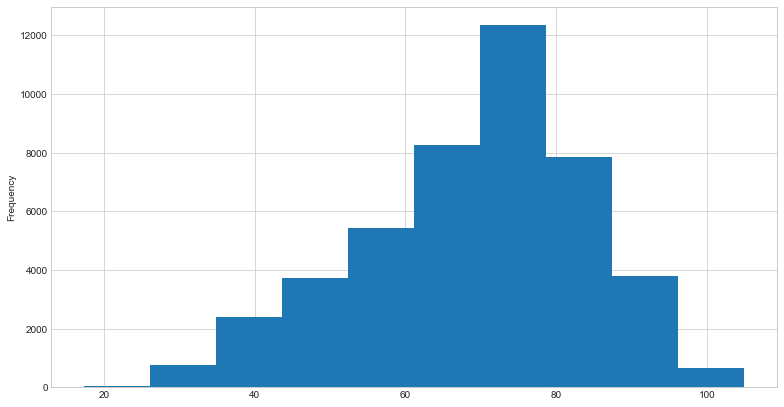

In [19]:
df.temp.plot.hist()

In [21]:
df['month'] = df.index.month
df.head()

,temp,month
datetime,,
2012-10-01 13:00:00,61.052000,10
2012-10-01 14:00:00,61.076568,10
2012-10-01 15:00:00,61.139294,10
2012-10-01 16:00:00,61.202020,10
2012-10-01 17:00:00,61.264747,10


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

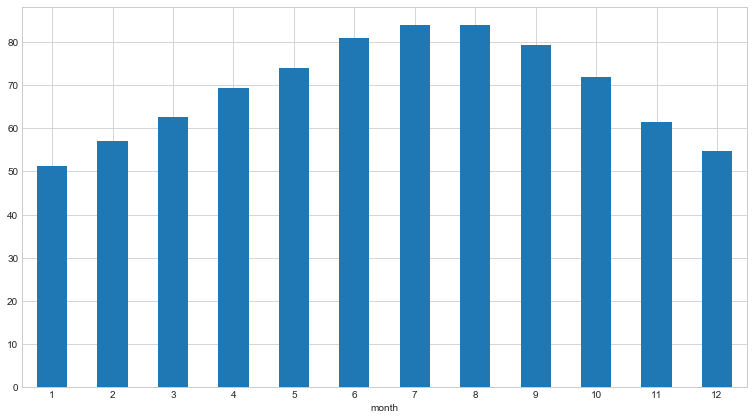

In [23]:
df.groupby('month').temp.mean().plot.bar()
plt.xticks(rotation=0)

In [27]:
df['weekday'] = df.index.day_name()
df.head()

,temp,month,weekday
datetime,,,
2012-10-01 13:00:00,61.052000,10,Monday
2012-10-01 14:00:00,61.076568,10,Monday
2012-10-01 15:00:00,61.139294,10,Monday
2012-10-01 16:00:00,61.202020,10,Monday
2012-10-01 17:00:00,61.264747,10,Monday


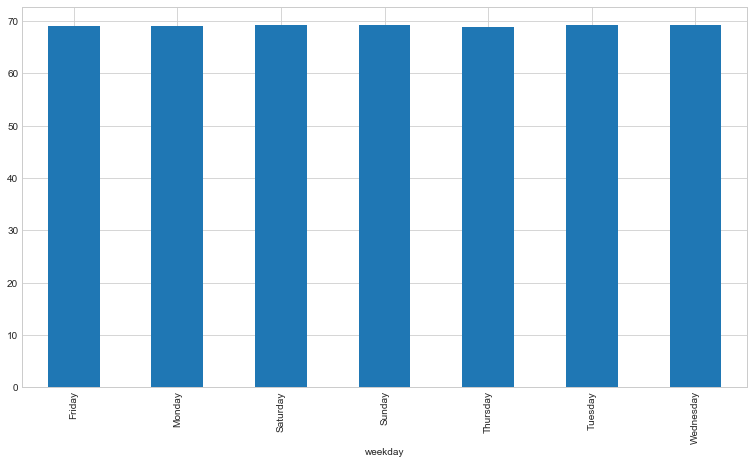

In [28]:
df.groupby('weekday').temp.mean().plot.bar()

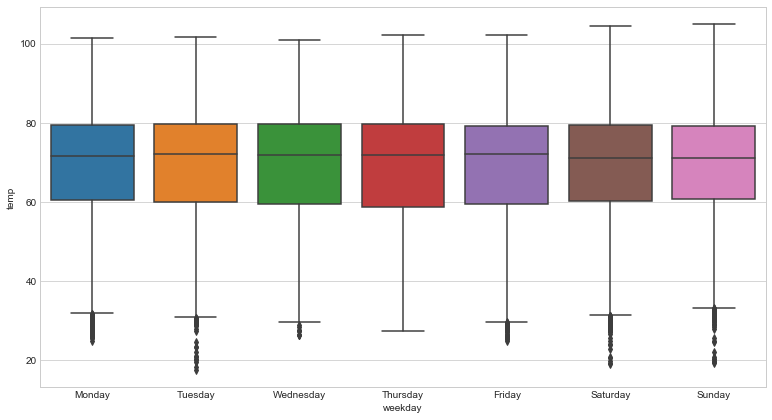

In [30]:
import seaborn as sns

sns.boxplot(data=df, y='temp', x='weekday')

2 y over time

In [32]:
y.head()

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
Name: temp, dtype: float64

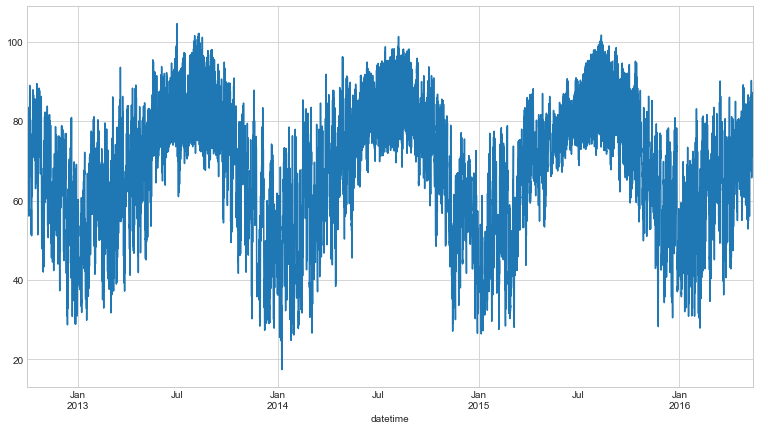

In [33]:
y.plot()

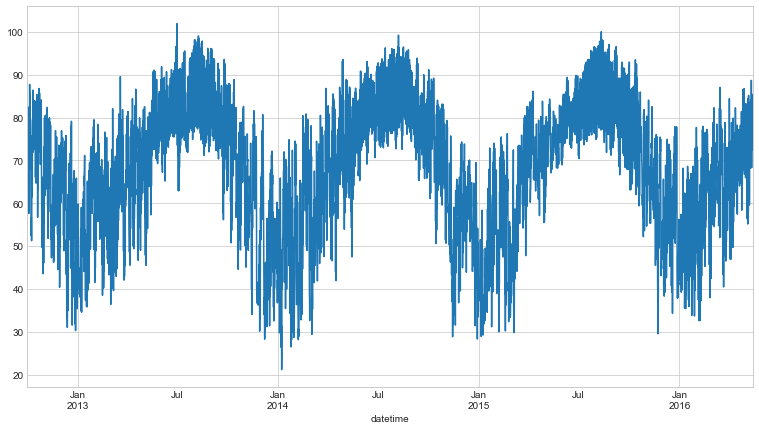

In [34]:
y.resample('6H').mean().plot()

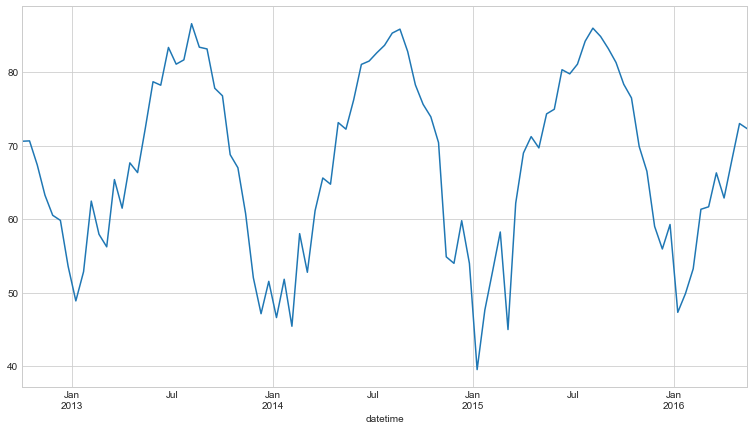

In [35]:
y.resample('2W').mean().plot()

3 y averaged over various periods over time

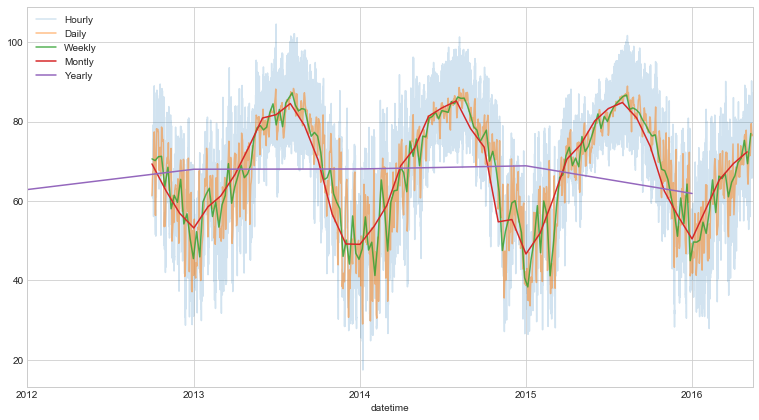

In [41]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

4 y.diff() over time

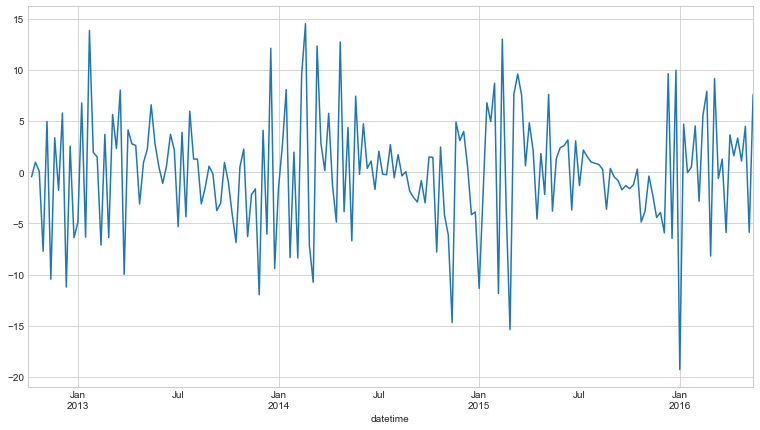

In [44]:
y.resample('W').mean().diff().plot()

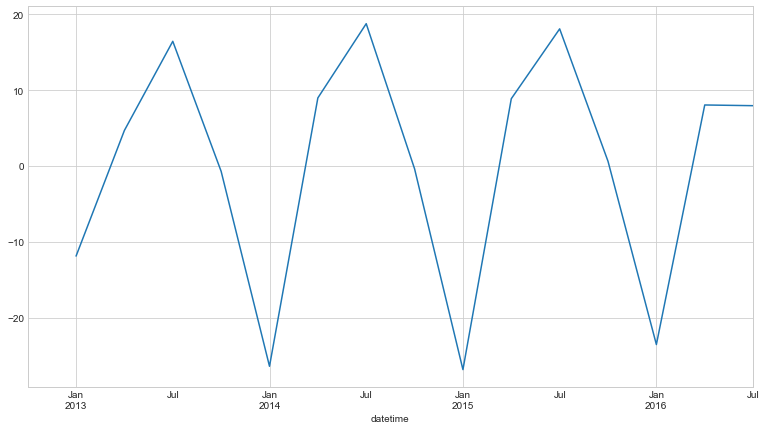

In [46]:
y.resample('3M').mean().diff().plot()

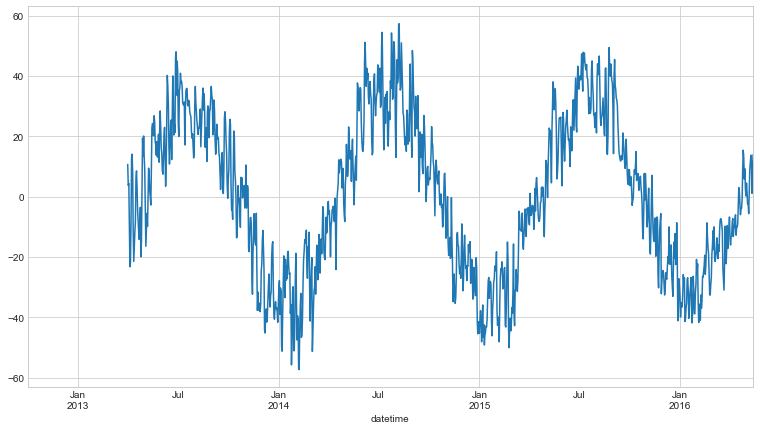

In [48]:
y.resample('D').mean().diff(182).plot()

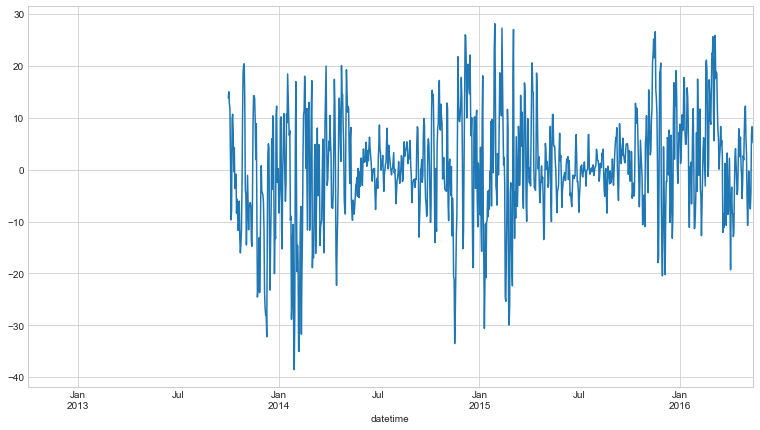

In [50]:
y.resample('D').mean().diff(365).plot()

5 Seasonal Plot

[Text(0.5, 1.0, 'Temperature over time')]

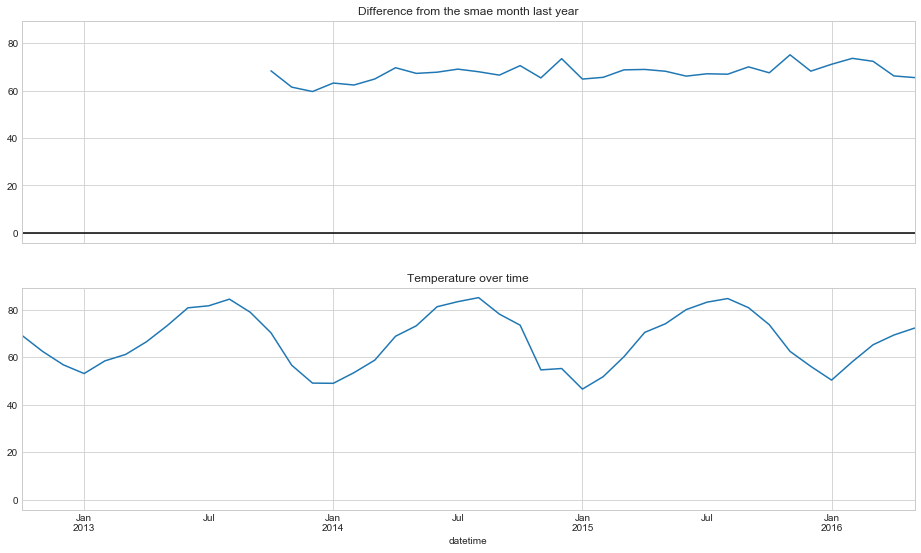

In [61]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(16, 9))

ax = y.resample('M').mean().diff(12).plot(ax=ax1)
ax1.hlines(0, *ax1.get_xlim())
ax1.set(title='Difference from the smae month last year')

y.resample('M').mean().plot(ax=ax2)
ax2.set(title='Temperature over time')

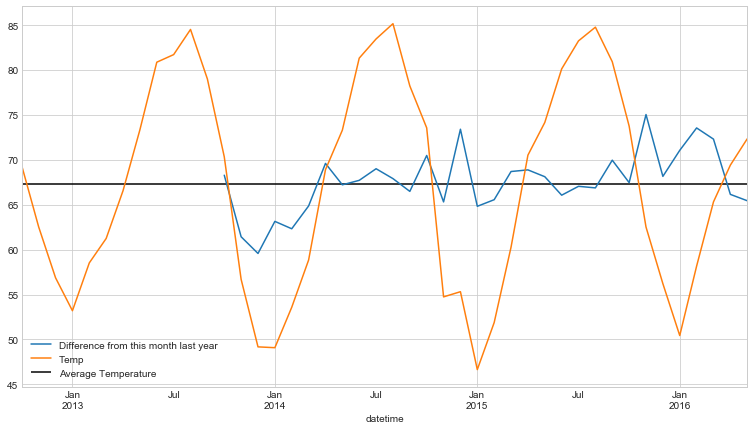

In [64]:
ax = (y.resample('M').mean().diff(12) + y.mean()).plot(label='Difference from this month last year')
ax.hlines(y.mean(), *ax1.get_xlim(), label='Average Temperature')

y.resample('M').mean().plot(ax=ax, label='Temp')
ax.legend()

6 Seasonal Subseries Plot

7 Lag Plot

8 Autocorrelation Plot

9 Seasonal Decomposition

10 Area Plots

## `strftime`

[Cheatsheet](https://zach.lol/strftime.html) or `man strftime`

In [7]:
df.head(5).index.strftime('The date is %B %d, %Y and the time is %I:%M %p')

Index(['The date is October 01, 2012 and the time is 01:00 PM',
       'The date is October 01, 2012 and the time is 02:00 PM',
       'The date is October 01, 2012 and the time is 03:00 PM',
       'The date is October 01, 2012 and the time is 04:00 PM',
       'The date is October 01, 2012 and the time is 05:00 PM'],
      dtype='object', name='datetime')

## Matplotlib Dates

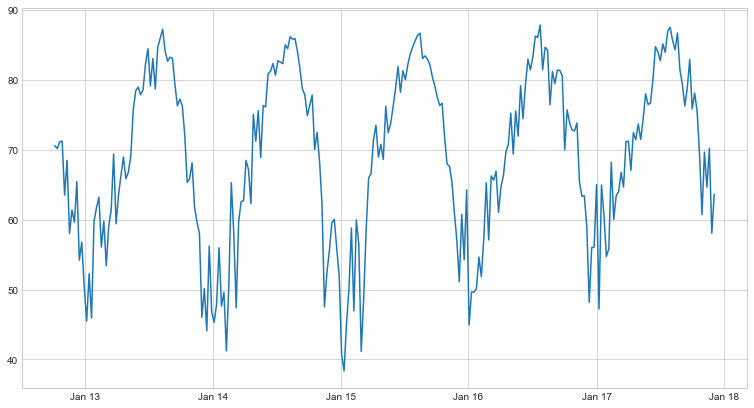

In [8]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = df.temp.resample('W').mean()

ax.plot(weekly.index, weekly)
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))

Q: How do we get monday to show up first? How to we order months properly?<br>
A: Prepend the number, e.g. 0-sunday, 1-monday; then they sort alphabetically and logically